In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Hng tasks/Hng task 2/hng task two- marketing_campaign_dataset.csv')
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Date,Clicks,Impressions,Engagement_Score,Customer_Segment
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,1/1/2021,506,1922,6,Health & Wellness
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,2/1/2021,116,7523,7,Fashionistas
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,3/1/2021,584,7698,1,Outdoor Adventurers
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,4/1/2021,217,1820,7,Health & Wellness
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,5/1/2021,379,4201,3,Health & Wellness


In [ ]:
duplicated_count = df.duplicated().sum()  #to check for duplicates
duplicated_count

0

In [ ]:
## TO change date format
def convert_date(date_str):
    formats_to_try = ["%d/%m/%Y", "%m/%d/%Y", "%Y-%m-%d",  # Add all your formats here!
                     "%d-%m-%Y", "%m-%d-%Y"] # Add more if needed
    for fmt in formats_to_try:
        try:
            return pd.to_datetime(date_str, format=fmt, errors='coerce')
        except ValueError:
            pass # Try the next format
    return pd.NaT  # Return NaT if none of the formats match


df['Date'] = df['Date'].apply(convert_date)
df['Date'] = df['Date'].dt.strftime('%d/%m/%Y')

In [ ]:
## TO change date format from object to datetime64
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

In [ ]:
## convert Acquisition_Cost to float
df['Acquisition_Cost'] = pd.to_numeric(df['Acquisition_Cost'].astype(str).str.replace(r'[$,]', '', regex=True), errors='coerce')

In [ ]:
df.info()  #to check for missing values, datatypes and inconsistencies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200005 entries, 0 to 200004
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Campaign_ID       200005 non-null  int64         
 1   Company           200005 non-null  object        
 2   Campaign_Type     200005 non-null  object        
 3   Target_Audience   200005 non-null  object        
 4   Duration          200005 non-null  object        
 5   Channel_Used      200005 non-null  object        
 6   Conversion_Rate   200005 non-null  float64       
 7   Acquisition_Cost  200005 non-null  float64       
 8   ROI               200005 non-null  float64       
 9   Location          200005 non-null  object        
 10  Date              200005 non-null  datetime64[ns]
 11  Clicks            200005 non-null  int64         
 12  Impressions       200005 non-null  int64         
 13  Engagement_Score  200005 non-null  int64         
 14  Cust

In [ ]:
## Descriptive Statistics
df.describe()

,Campaign_ID,Conversion_Rate,Acquisition_Cost,ROI,Date,Clicks,Impressions,Engagement_Score
count,200005.000000,200005.000000,200005.000000,200005.000000,200005,200005.000000,200005.000000,200005.000000
mean,100003.000000,0.080069,12504.441794,5.002416,2021-07-01 23:37:44.289392896,549.774591,5507.307107,5.494673
min,1.000000,0.010000,5000.000000,2.000000,2021-01-01 00:00:00,100.000000,1000.000000,1.000000
25%,50002.000000,0.050000,8740.000000,3.500000,2021-04-02 00:00:00,325.000000,3266.000000,3.000000
50%,100003.000000,0.080000,12497.000000,5.010000,2021-07-02 00:00:00,550.000000,5518.000000,5.000000
75%,150004.000000,0.120000,16264.000000,6.510000,2021-10-01 00:00:00,775.000000,7753.000000,8.000000
max,200005.000000,0.150000,20000.000000,8.000000,2021-12-31 00:00:00,1000.000000,10000.000000,10.000000
std,57736.614632,0.040602,4337.663210,1.734485,NaN,260.019354,2596.863794,2.872593


In [ ]:
df.isnull().sum()  ##to check for missing values

,0
Campaign_ID,0
Company,0
Campaign_Type,0
Target_Audience,0
Duration,0
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,0
ROI,0
Location,0


In [ ]:
df.nunique()  ## to find unique target audiences and marketing channels

,0
Campaign_ID,200005
Company,5
Campaign_Type,5
Target_Audience,5
Duration,4
Channel_Used,6
Conversion_Rate,15
Acquisition_Cost,15001
ROI,601
Location,5


In [ ]:
## Find outliers using IQR method
numerical_cols = ['Impressions', 'Clicks', 'Acquisition_Cost','Engagement_Score', 'ROI', 'Conversion_Rate']
def detect_outliers_iqr(data, col):
    Q1 = np.percentile(data[col].dropna(), 25)
    Q3 = np.percentile(data[col].dropna(), 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

for col in numerical_cols:
    if col in df.columns:
        outliers = detect_outliers_iqr(df, col)
        print(f"\nOutliers in {col}:\n", outliers)


Outliers in Impressions:
 Empty DataFrame
Columns: [Campaign_ID, Company, Campaign_Type, Target_Audience, Duration, Channel_Used, Conversion_Rate, Acquisition_Cost, ROI, Location, Date, Clicks, Impressions, Engagement_Score, Customer_Segment]
Index: []

Outliers in Clicks:
 Empty DataFrame
Columns: [Campaign_ID, Company, Campaign_Type, Target_Audience, Duration, Channel_Used, Conversion_Rate, Acquisition_Cost, ROI, Location, Date, Clicks, Impressions, Engagement_Score, Customer_Segment]
Index: []

Outliers in Acquisition_Cost:
 Empty DataFrame
Columns: [Campaign_ID, Company, Campaign_Type, Target_Audience, Duration, Channel_Used, Conversion_Rate, Acquisition_Cost, ROI, Location, Date, Clicks, Impressions, Engagement_Score, Customer_Segment]
Index: []

Outliers in Engagement_Score:
 Empty DataFrame
Columns: [Campaign_ID, Company, Campaign_Type, Target_Audience, Duration, Channel_Used, Conversion_Rate, Acquisition_Cost, ROI, Location, Date, Clicks, Impressions, Engagement_Score, Custome

In [ ]:
## Calculate Key Metrics
df['CTR'] = (df['Clicks'] / df['Impressions']) * 100  # Click-Through Rate (%)
df['CPC'] = df['Acquisition_Cost'] / df['Clicks']  # Cost Per Click
##df['Conversion Rate'] = (df['Conversion_Rate'] * 100)  # Conversion Rate

print("\nKey Metrics (CTR, CPC):\n", df[['Campaign_ID', 'CTR', 'CPC', 'Conversion_Rate']].head(15))


Key Metrics (CTR, CPC):
     Campaign_ID        CTR        CPC  Conversion_Rate
0             1  26.326743  31.964427             0.04
1             2   1.541938  99.706897             0.12
2             3   7.586386  17.465753             0.07
3             4  11.923077  58.635945             0.11
4             5   9.021662  43.408971             0.05
5             6   6.086427  97.160000             0.07
6             7   9.338210  13.545900             0.13
7             8   7.944996  21.282051             0.08
8             9  49.087799  20.982578             0.09
9            10  16.649378  21.442368             0.09
10           11   4.843090  26.760125             0.12
11           12   7.364774  26.558422             0.05
12           13   7.678349  25.389956             0.09
13           14  45.161290  10.035211             0.14
14           15   5.690673  23.539419             0.04



Top Performing Campaigns:
         Campaign_ID  ROI
182656       182657  8.0
83445         83446  8.0
73036         73037  8.0
140372       140373  8.0
104050       104051  8.0

Underperforming Campaigns:
         Campaign_ID  ROI
153591       153592  2.0
79336         79337  2.0
117384       117385  2.0
175913       175914  2.0
165094       165095  2.0


<ipython-input-20-79c59264ddc9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Campaign_ID', y='ROI', data=top_campaigns, palette="Greens_r")


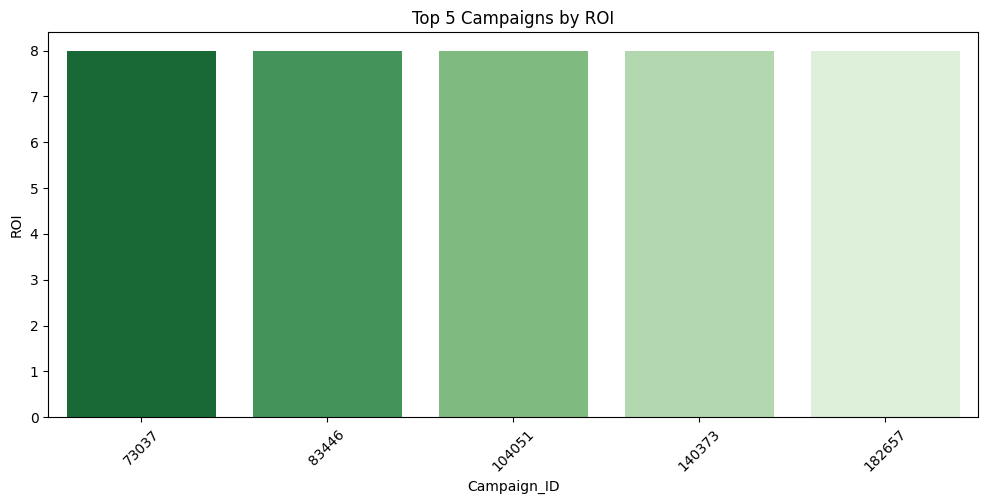

In [ ]:
 ## Identify high-performing and underperforming campaigns based on ROI

top_campaigns = df.sort_values(by="ROI", ascending=False).head(5)  # Top 5 campaigns
low_campaigns = df.sort_values(by="ROI", ascending=True).head(5)  # Bottom 5 campaigns

print("\nTop Performing Campaigns:\n", top_campaigns[['Campaign_ID', 'ROI']])
print("\nUnderperforming Campaigns:\n", low_campaigns[['Campaign_ID', 'ROI']])

# Visualization of ROI
plt.figure(figsize=(12, 5))
sns.barplot(x='Campaign_ID', y='ROI', data=top_campaigns, palette="Greens_r")
plt.xticks(rotation=45)
plt.title("Top 5 Campaigns by ROI")
plt.show()


Location-Based Performance:
       Location  Impressions    Clicks  Acquisition_Cost  Conversion_Rate  \
0      Chicago    219999352  21980408       500771983.0          3206.27   
1      Houston    219129799  21893075       495080401.0          3178.05   
2  Los Angeles    219652325  21966553       500637366.0          3196.28   
3        Miami    221347726  22056765       503974911.0          3223.43   
4     New York    221359756  22060866       500486220.0          3210.14   

         CTR  
0   9.991124  
1   9.990916  
2  10.000601  
3   9.964758  
4   9.966069  


<ipython-input-22-5fe043aa5864>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='CTR', data=location_analysis.sort_values(by="CTR", ascending=False), palette="coolwarm")


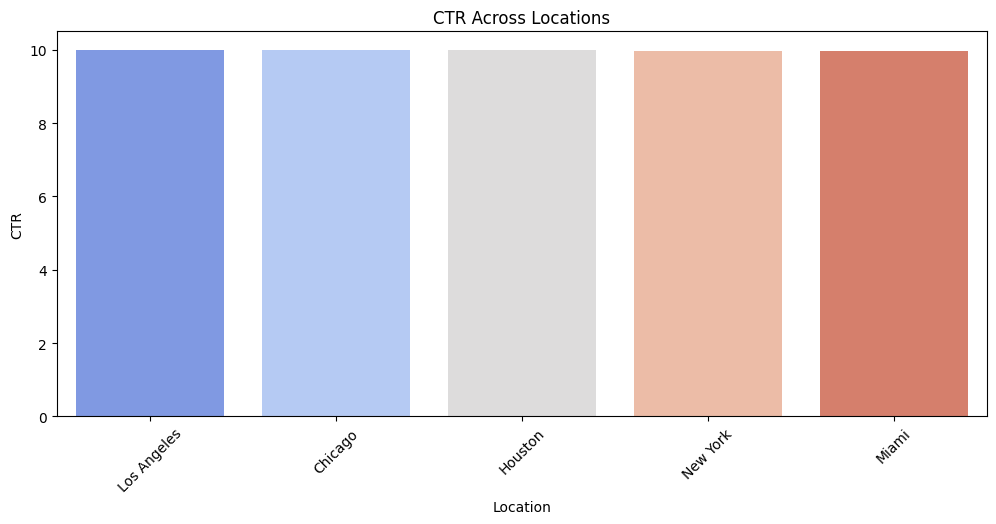

In [ ]:
## Location-Based Analysis
if 'Location' in df.columns:
    location_analysis = df.groupby('Location').agg({
        'Impressions': 'sum',
        'Clicks': 'sum',
        'Acquisition_Cost': 'sum',
        'Conversion_Rate': 'sum'
    }).reset_index()

    location_analysis['CTR'] = (location_analysis['Clicks'] / location_analysis['Impressions']) * 100
    location_analysis['Conversion_Rate'] = (location_analysis['Conversion_Rate'])

    print("\nLocation-Based Performance:\n", location_analysis.head())

    # Visualization of CTR by location
    plt.figure(figsize=(12, 5))
    sns.barplot(x='Location', y='CTR', data=location_analysis.sort_values(by="CTR", ascending=False), palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title("CTR Across Locations")
    plt.show()


Campaign Performance by Marketing Channel:
   Channel_Used  Impressions    Clicks  Acquisition_Cost  Conversion_Rate
0        Email    184801107  18493963       420874104.0          2697.38
1     Facebook    180662496  18038175       410603426.0          2625.27
2   Google Ads    185020154  18342589       418944514.0          2681.24
3    Instagram    183738455  18316654       417124850.0          2667.57
4      Website    183815901  18415351       416606897.0          2674.95
5      YouTube    183450845  18350935       416797090.0          2667.76


<ipython-input-23-5b5ade8f677f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Channel_Used', y='Conversion_Rate', data=channel_performance.sort_values(by="Conversion_Rate", ascending=False), palette="coolwarm")


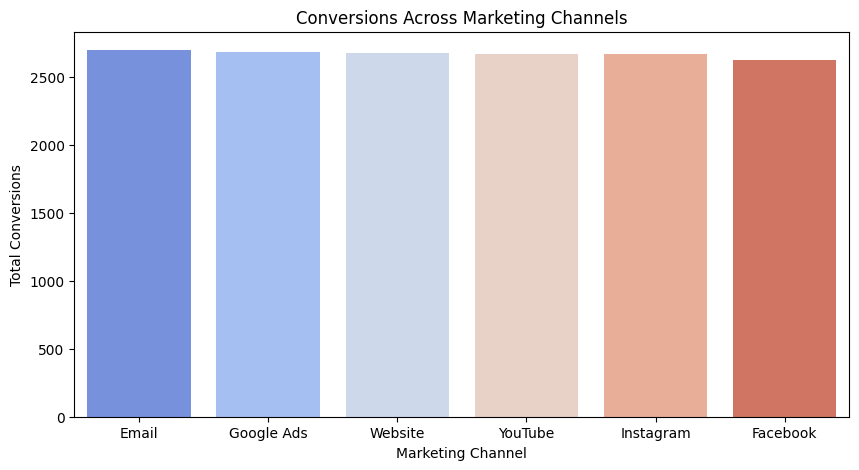

In [ ]:
## BAR CHART: Conversions Across Marketing Channels
if 'Channel_Used' in df.columns and 'Impressions' in df.columns and 'Conversion_Rate' in df.columns:
    channel_performance = df.groupby('Channel_Used').agg({
        'Impressions': 'sum',
        'Clicks': 'sum',
        'Acquisition_Cost': 'sum',
        'Conversion_Rate': 'sum'
    }).reset_index()

    print("\nCampaign Performance by Marketing Channel:\n", channel_performance)

    # Visualization
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Channel_Used', y='Conversion_Rate', data=channel_performance.sort_values(by="Conversion_Rate", ascending=False), palette="coolwarm")
    plt.title("Conversions Across Marketing Channels")
    plt.xlabel("Marketing Channel")
    plt.ylabel("Total Conversions")
    plt.show()

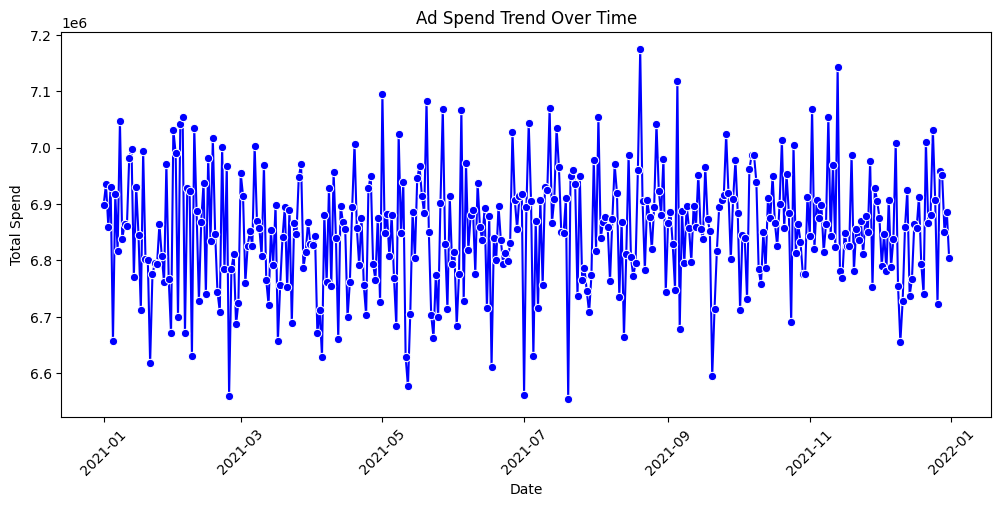

In [ ]:
## LINE GRAPH: Ad Spend Trend Over Time
if 'Date' in df.columns and 'Acquisition_Cost' in df.columns:
   ## df['Date'] = pd.to_datetime(df['Date'])  # Convert date column to datetime
    df_time = df.groupby('Date')['Acquisition_Cost'].sum().reset_index()

    plt.figure(figsize=(12, 5))
    sns.lineplot(x='Date', y='Acquisition_Cost', data=df_time, marker="o", color="blue")
    plt.title("Ad Spend Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel("Total Spend")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# Extract month and year from the 'date' column
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

Monthly Spend Data:
    year  month  Acquisition_Cost
0   2021      1       212316141.0
1   2021      2       191592480.0
2   2021      3       212082085.0
3   2021      4       204473197.0
4   2021      5       212087084.0
5   2021      6       205374592.0
6   2021      7       212437111.0
7   2021      8       213172936.0
8   2021      9       205934708.0
9   2021     10       212767720.0
10  2021     11       206408496.0
11  2021     12       212304331.0

Month with the Highest Spend:
year                     2021.0
month                       8.0
Acquisition_Cost    213172936.0
Name: 7, dtype: float64


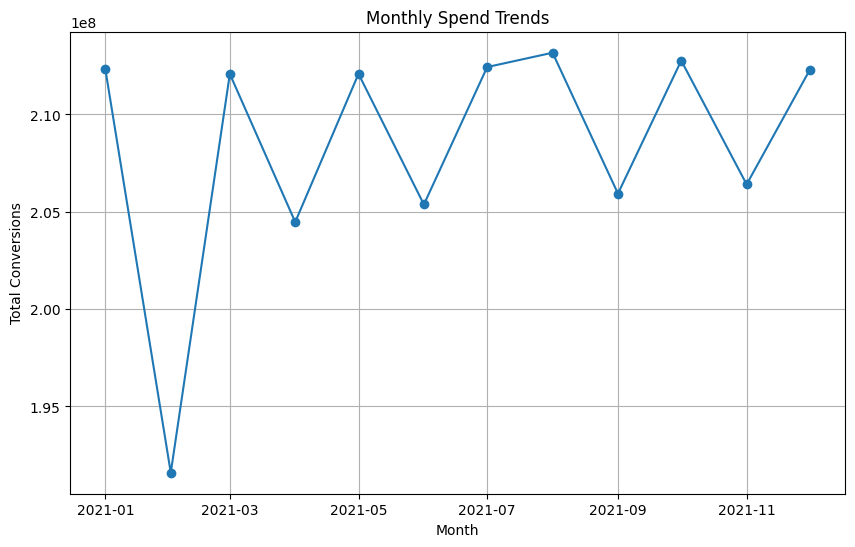

In [ ]:
## LINE GRAPH: Ad Spend Trend per month
# Group by month and sum the acquisition cost(ad spend) for each month
monthly_ad_spend = df.groupby(['year' , 'month'])['Acquisition_Cost'].sum().reset_index()

# Find the month with the highest total spend
max_spend_month = monthly_ad_spend.loc[monthly_ad_spend['Acquisition_Cost'].idxmax()]

# Print the monthly spend data and the month with the highest spend
print("Monthly Spend Data:")
print(monthly_ad_spend)

print("\nMonth with the Highest Spend:")
print(max_spend_month)

# Plotting
plt.figure(figsize=(10, 6))

# Create a 'Date' column by combining year and month
monthly_ad_spend['Date'] = pd.to_datetime(monthly_ad_spend[['year', 'month']].assign(DAY=1))

# Now you can plot using the new 'Date' column
plt.plot(monthly_ad_spend['Date'], monthly_ad_spend['Acquisition_Cost'], marker='o')
plt.title('Monthly Spend Trends')
plt.xlabel('Month')
plt.ylabel('Total Conversions')
plt.grid(True)
plt.show()

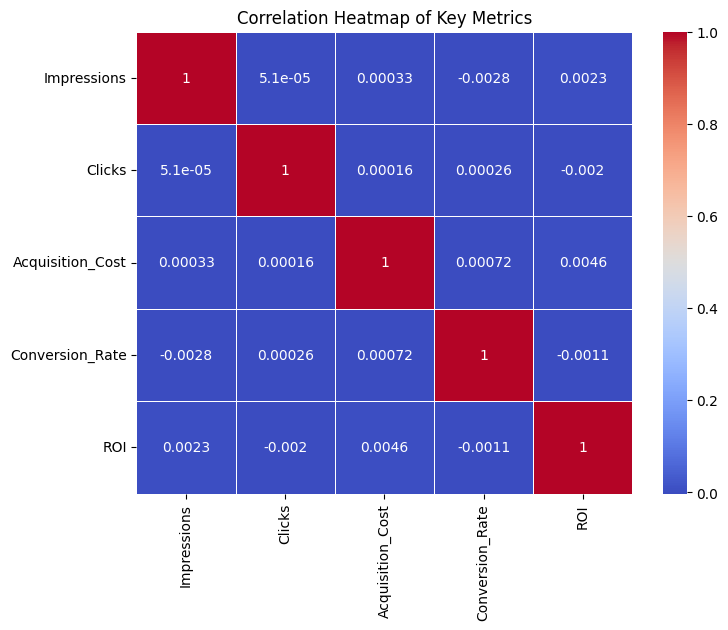

In [ ]:
## HEATMAP: Correlation Between Key Metrics
if {'Impressions', 'Clicks', 'Acquisition_Cost', 'Conversion_Rate', 'ROI'}.issubset(df.columns):
    correlation_matrix = df[['Impressions', 'Clicks', 'Acquisition_Cost', 'Conversion_Rate', 'ROI']].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Heatmap of Key Metrics")
    plt.show()

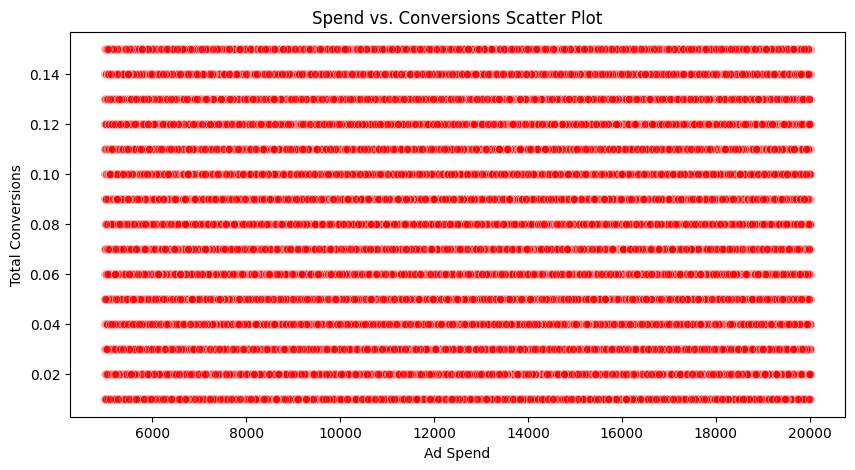

In [ ]:
 ## SCATTER PLOT : Spend vs. Conversions
if 'Acquisition_Cost' in df.columns and 'Conversion_Rate' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x='Acquisition_Cost', y='Conversion_Rate', data=df, alpha=0.6, color='red')
   ## sns.kdeplot(x=df['Acquisition_Cost'], y=df['Conversion_Rate'], cmap="Reds", fill=True, alpha=0.3)
    plt.title("Spend vs. Conversions Scatter Plot")
    plt.xlabel("Ad Spend")
    plt.ylabel("Total Conversions")
    plt.show()

Monthly ROI Data:
    year  month       ROI
0   2021      1  85316.62
1   2021      2  76992.53
2   2021      3  84981.96
3   2021      4  82168.57
4   2021      5  84915.09
5   2021      6  82301.42
6   2021      7  84688.92
7   2021      8  84543.97
8   2021      9  82465.23
9   2021     10  84972.57
10  2021     11  82136.06
11  2021     12  85025.36

Month with the Highest ROI:
year      2021.00
month        1.00
ROI      85316.62
Name: 0, dtype: float64


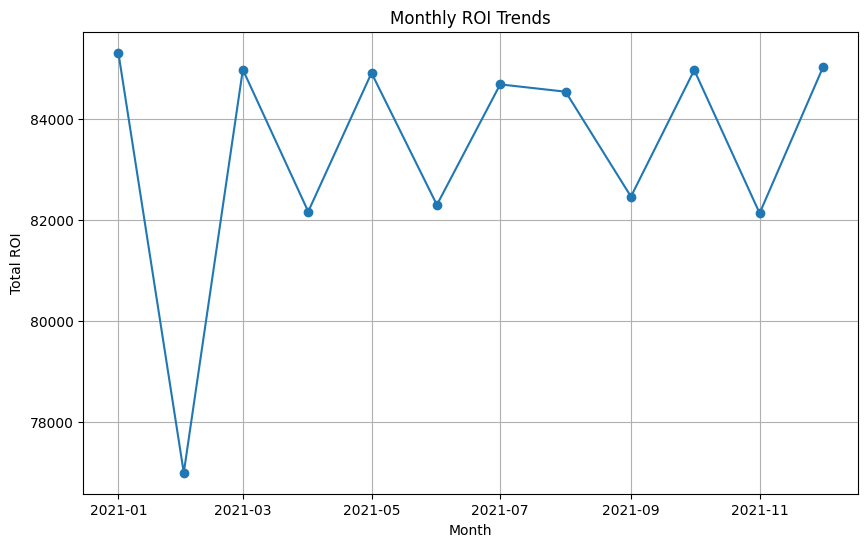

In [ ]:
## LINE GRAPH: ROI Trend per month
# Group by month and sum the ROI for each month
monthly_ROI = df.groupby(['year' , 'month'])['ROI'].sum().reset_index()

# Find the month with the highest total ROI
max_ROI_month = monthly_ROI.loc[monthly_ROI['ROI'].idxmax()]

# Print the monthly ROI data and the month with the highest ROI
print("Monthly ROI Data:")
print(monthly_ROI)

print("\nMonth with the Highest ROI:")
print(max_ROI_month)
# Plotting
plt.figure(figsize=(10, 6))

# Create a 'Date' column by combining year and month
monthly_ROI['Date'] = pd.to_datetime(monthly_ROI[['year', 'month']].assign(DAY=1))

# Now you can plot using the new 'Date' column
plt.plot(monthly_ROI['Date'], monthly_ROI['ROI'], marker='o')
plt.title('Monthly ROI Trends')
plt.xlabel('Month')
plt.ylabel('Total ROI')
plt.grid(True)
plt.show()